### Importando bibliotecas

In [1]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
from compexp import compexp

### Função de plot

In [2]:
def plot_compexp(n, x, y, rms, f, G, g, filename):
    fig, ax = plt.subplots(nrows=3, ncols=2, sharey='row', figsize=(15, 15))

    plt.subplot(321)
    plt.plot(n, x)
    plt.title(r'Input signal $x[n]$')
    plt.ylabel(r'$x[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(322)
    plt.plot(n, y)
    plt.title(r'Output signal $y[n]$')
    plt.ylabel(r'$y[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(323)
    plt.plot(n, rms)
    plt.title(r'Final $X_{rms}[n]$')
    plt.ylabel(r'$X_rms[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(324)
    plt.plot(n, f)
    plt.title(r'Final $f[n]$')
    plt.ylabel(r'$f[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(325)
    plt.plot(n, G)
    plt.title(r'Final $G[n]$')
    plt.ylabel(r'$G[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(326)
    plt.plot(n, g)
    plt.title(r'Final $g[n]$')
    plt.ylabel(r'$g[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.savefig(f"figures/{filename}.jpg", dpi=600, bbox_inches='tight')
    plt.show()

### Sinal de entrada $x[n]$

In [3]:
N = 1200
n = np.arange(N)
fs = 100
ts = 1/fs

In [4]:
t1 = np.arange(0, int(N/3))/fs
t2 = np.arange(int(N/3), int(2*N/3))/fs
t3 = np.arange(int(2*N/3), N)/fs

x1 = 0.3* np.sin(np.multiply(2 * np.pi, t1))
x2 = 2 * np.sin(np.multiply(2 * np.pi, t2))
x3 = 4 * np.sin(np.multiply(2 * np.pi, t3))
x_raw = [x1, x2, x3]
x = np.concatenate(x_raw)

### Compressor

In [5]:
CT = 0.5
ET = 0.1
CS = 0.3
ES = 0.1

tav = 0.01
at = 0.03
rt = 0.003
delay = 20

y, rms, G, f, g = compexp(x, CT, CS, ET, ES, tav, at, rt, delay)

/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:44: RuntimeWarning: divide by zero encountered in log10
  X = 10 * np.log10(xrms)


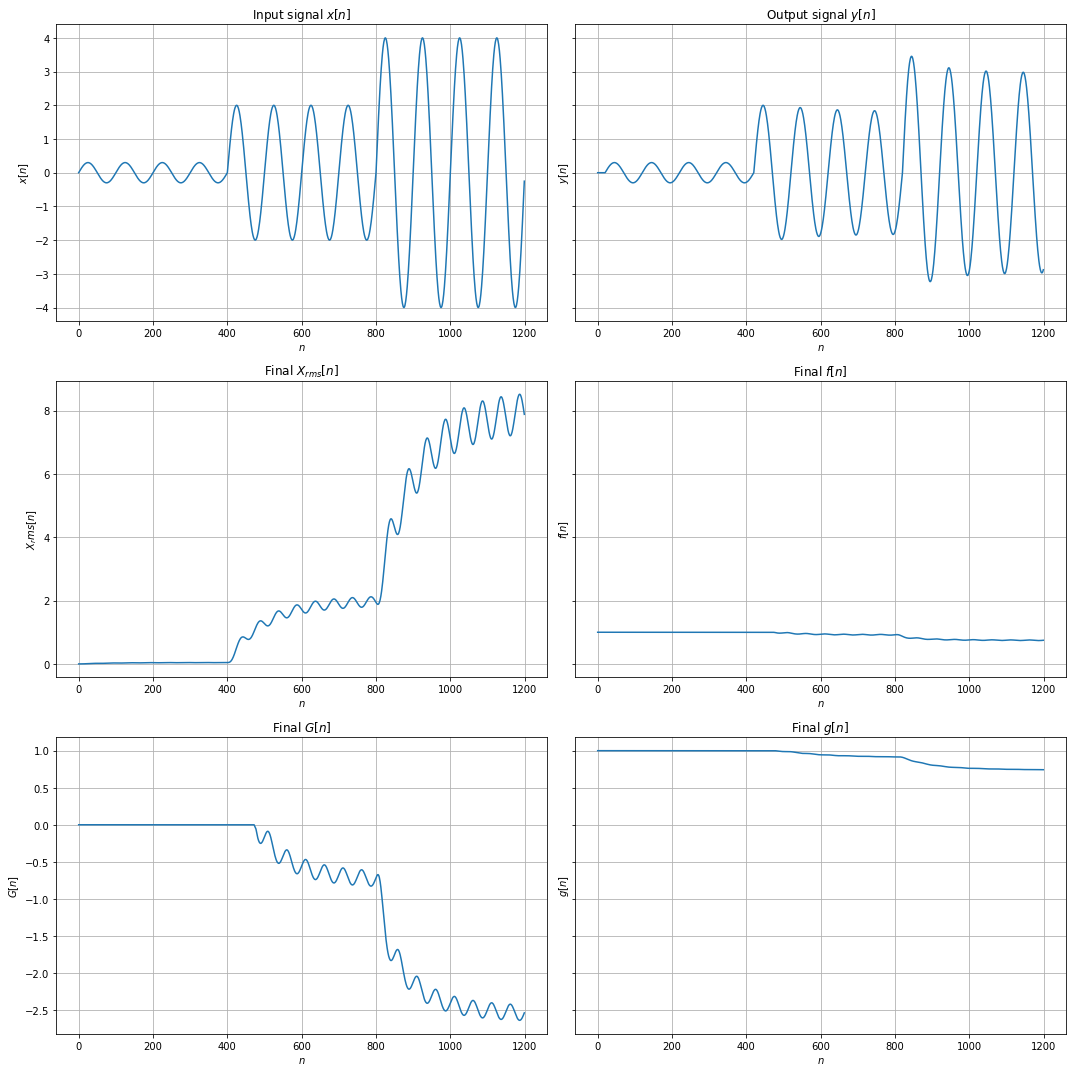

In [6]:
plot_compexp(n, x, y, rms, f, G, g, 'compexp_simple_compressor')

### Expander

In [7]:
CT = 1
ET = 0.05
CS = 0.1
ES = -3

tav = 0.01
at = 0.03
rt = 0.01
delay = 20

y, rms, G, f, g = compexp(x, CT, CS, ET, ES, tav, at, rt, delay)

/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:44: RuntimeWarning: divide by zero encountered in log10
  X = 10 * np.log10(xrms)


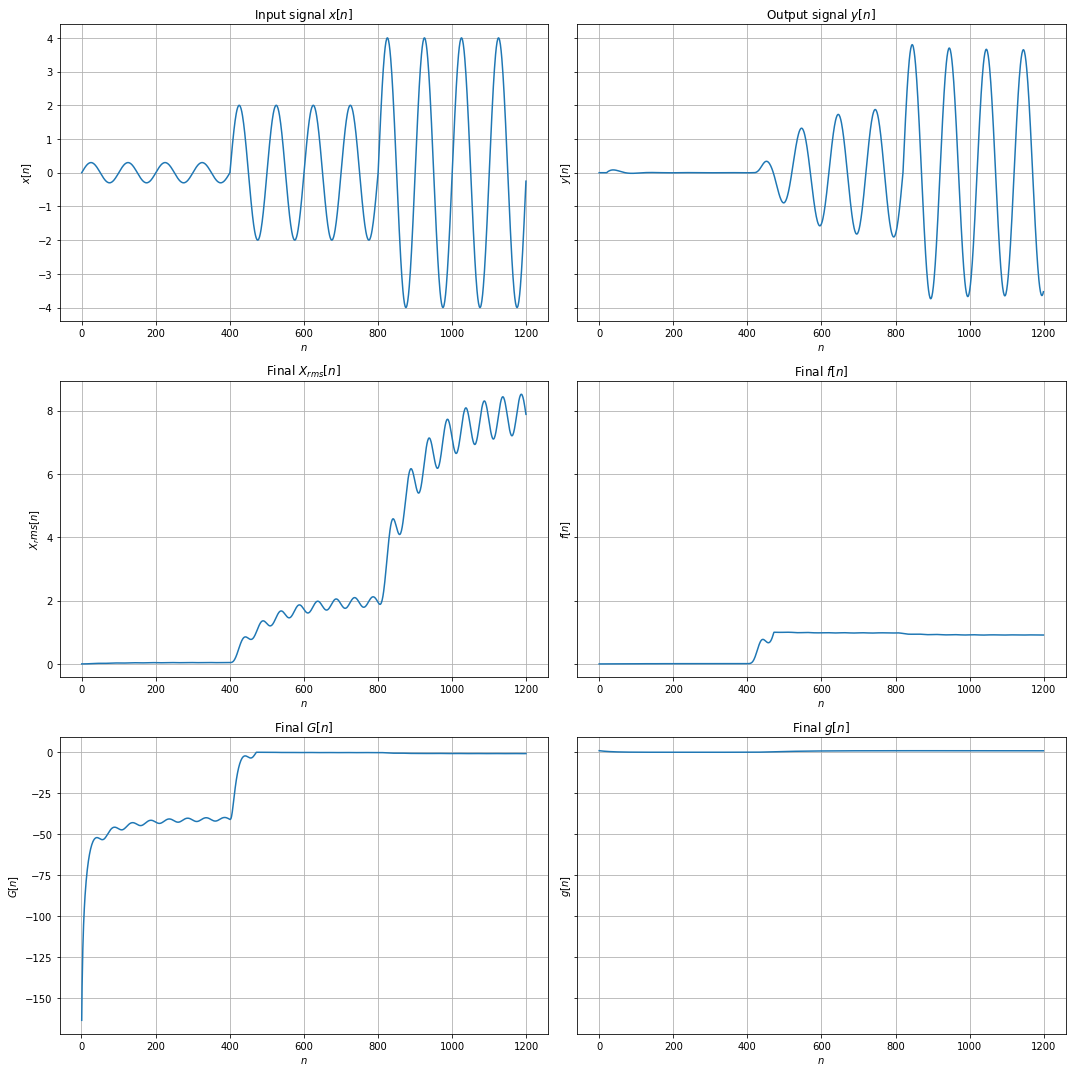

In [8]:
plot_compexp(n, x, y, rms, f, G, g, 'compexp_simple_expander')

### Vocalize

In [9]:
x, sr = sf.read('audios/vocalize.wav')
x = np.mean(x, axis=-1)
n = np.arange(len(x))
print(x.shape)

(476281,)


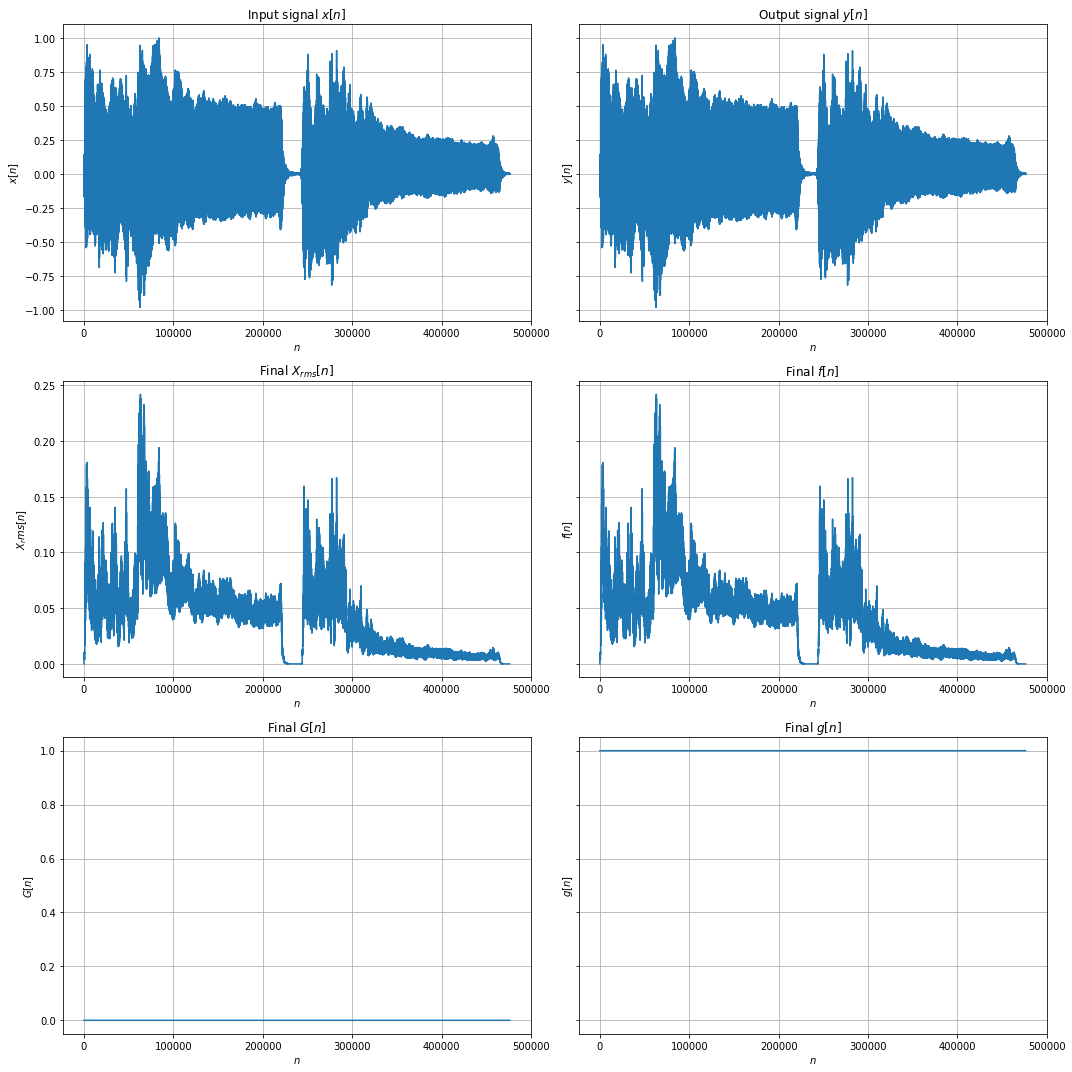

In [10]:
CT = 0.5
ET = 0.1
CS = 0.3
ES = 0.1

tav = 0.01
at = 0.03
rt = 0.003
delay = 20

y, rms, G, f, g = compexp(x, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x, y, rms, f, G, g, 'compexp_vocalize_compressor')
sf.write('audios/vocalize_compressor_out.wav', y, sr)

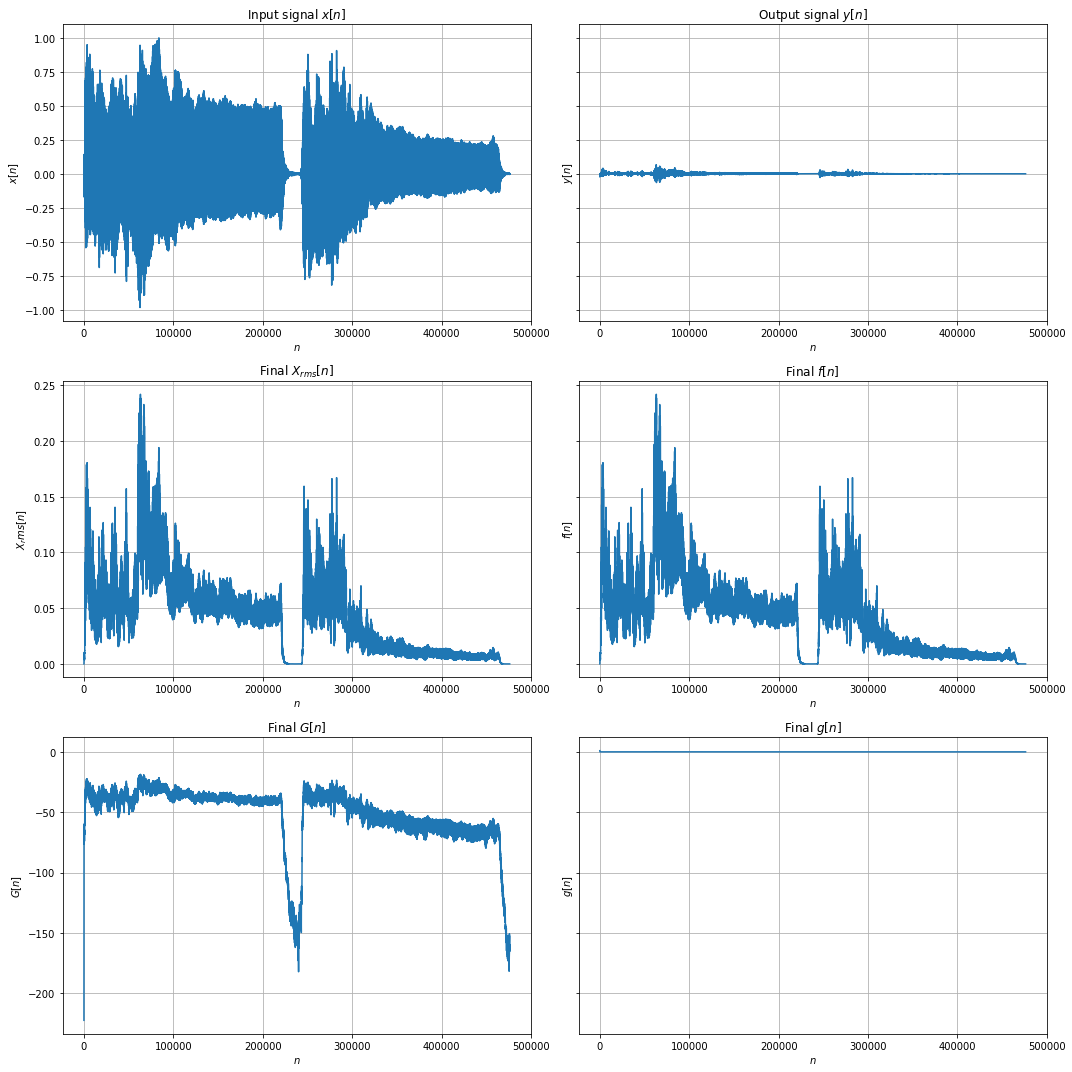

In [11]:
CT = 1
ET = 0.05
CS = 0.1
ES = -3

tav = 0.01
at = 0.03
rt = 0.01
delay = 20

y, rms, G, f, g = compexp(x, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x, y, rms, f, G, g, 'compexp_vocalize_expander')
sf.write('audios/vocalize_expander_out.wav', y, sr)

### Berimbau

In [12]:
x, sr = sf.read('audios/berimbau.wav')
x = np.mean(x, axis=-1)
n = np.arange(len(x))
print(x.shape)

(1200645,)


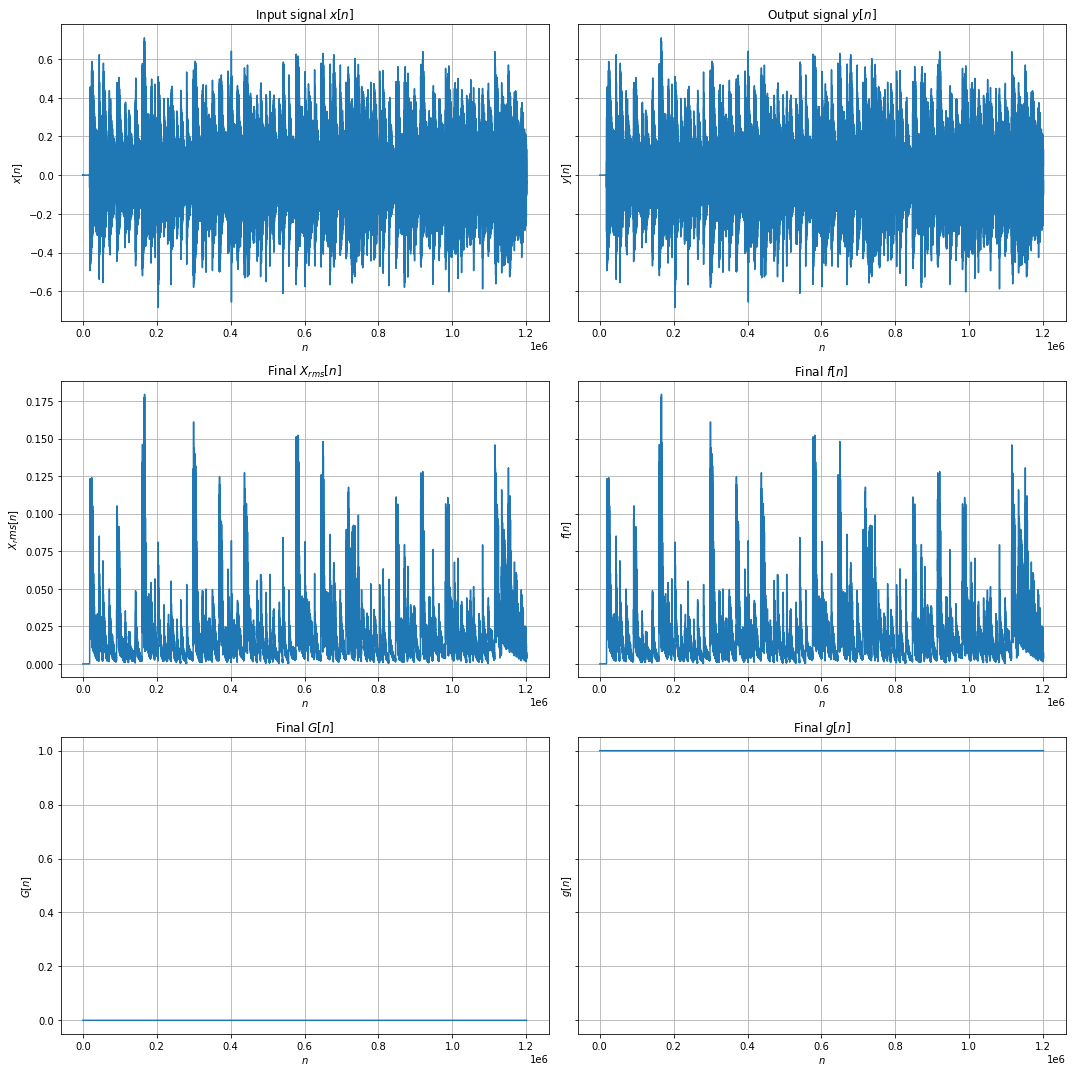

In [13]:
CT = 2
ET = 1
CS = 0.18
ES = 0.1

tav = 0.01
at = 0.03
rt = 0.003
delay = 20

y, rms, G, f, g = compexp(x, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x, y, rms, f, G, g, 'compexp_berimbau_compressor')
sf.write('audios/vocalize_berimbau_out.wav', y, sr)

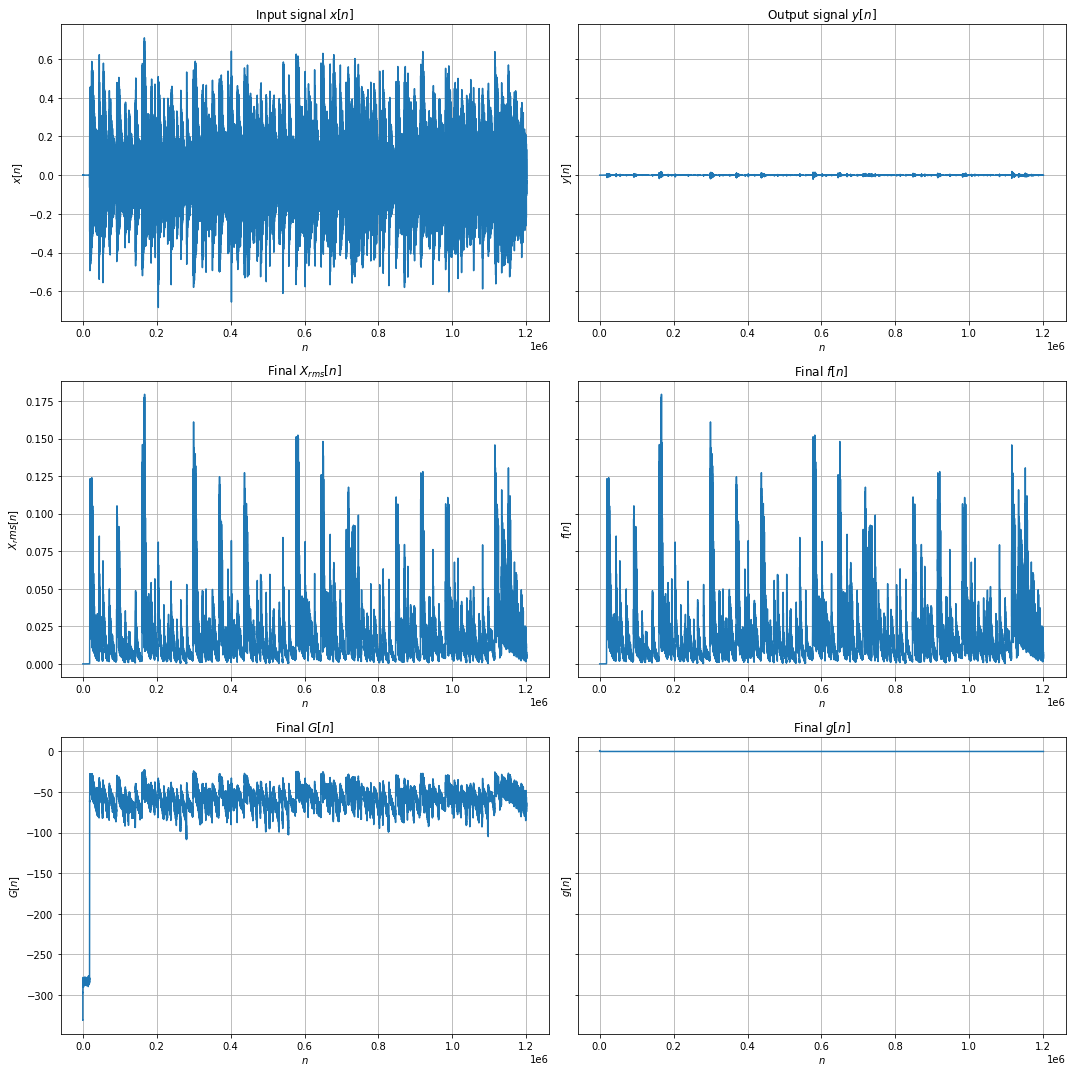

In [14]:
CT = 1
ET = 0.05
CS = 0.1
ES = -3

tav = 0.01
at = 0.03
rt = 0.01
delay = 20

y, rms, G, f, g = compexp(x, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x, y, rms, f, G, g, 'compexp_berimbau_expander')
sf.write('audios/vocalize_berimbau_out.wav', y, sr)

### Guitarra

In [15]:
x, sr = sf.read('audios/gtr-jazz-3.wav')
x = np.mean(x, axis=-1)
n = np.arange(len(x))
print(x.shape)

(920540,)


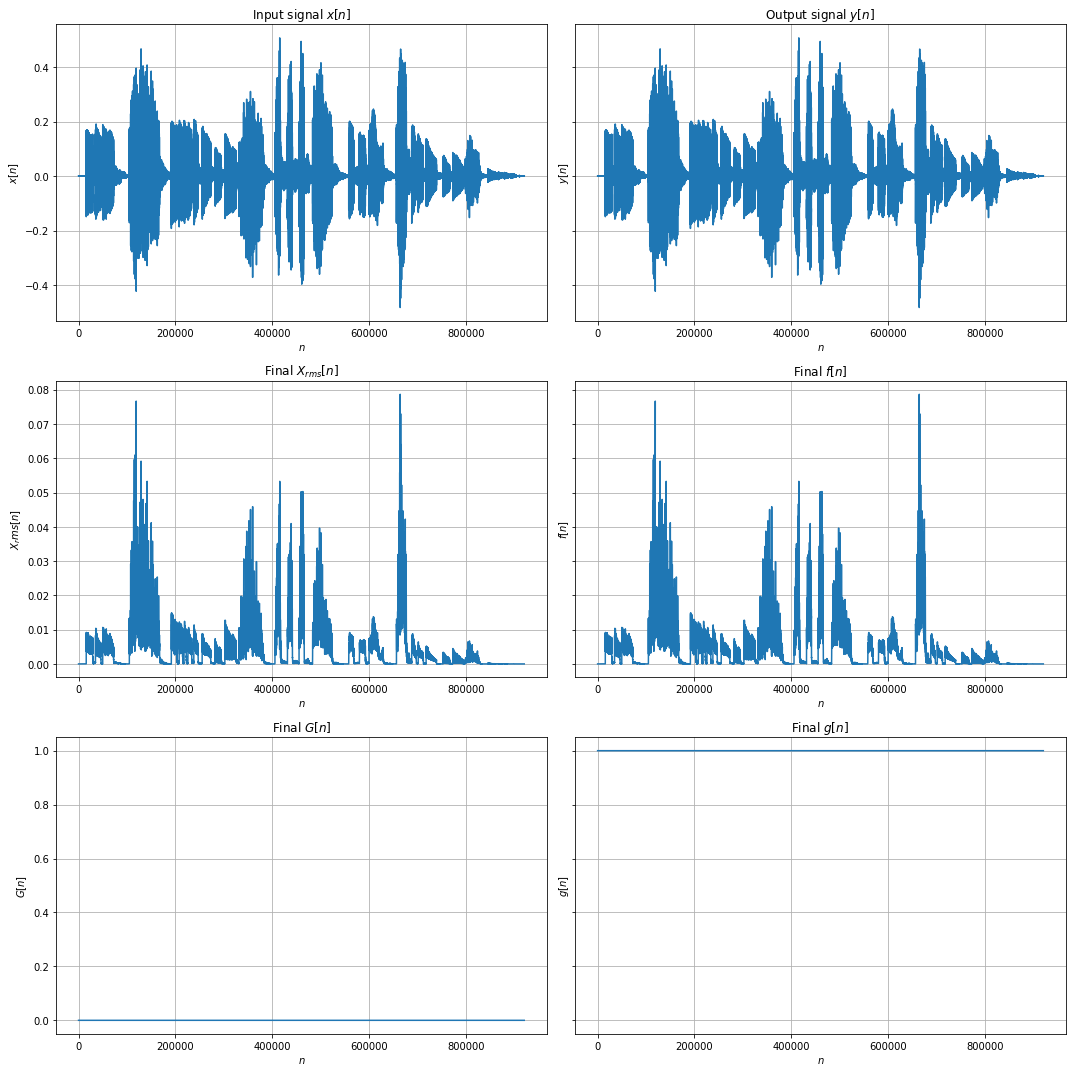

In [16]:
CT = 0.5
ET = 0.1
CS = 0.3
ES = 0.1

tav = 0.01
at = 0.03
rt = 0.003
delay = 20

y, rms, G, f, g = compexp(x, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x, y, rms, f, G, g, 'compexp_gtr-jazz-3_compressor')
sf.write('audios/vocalize_gtr-jazz-3_out.wav', y, sr)

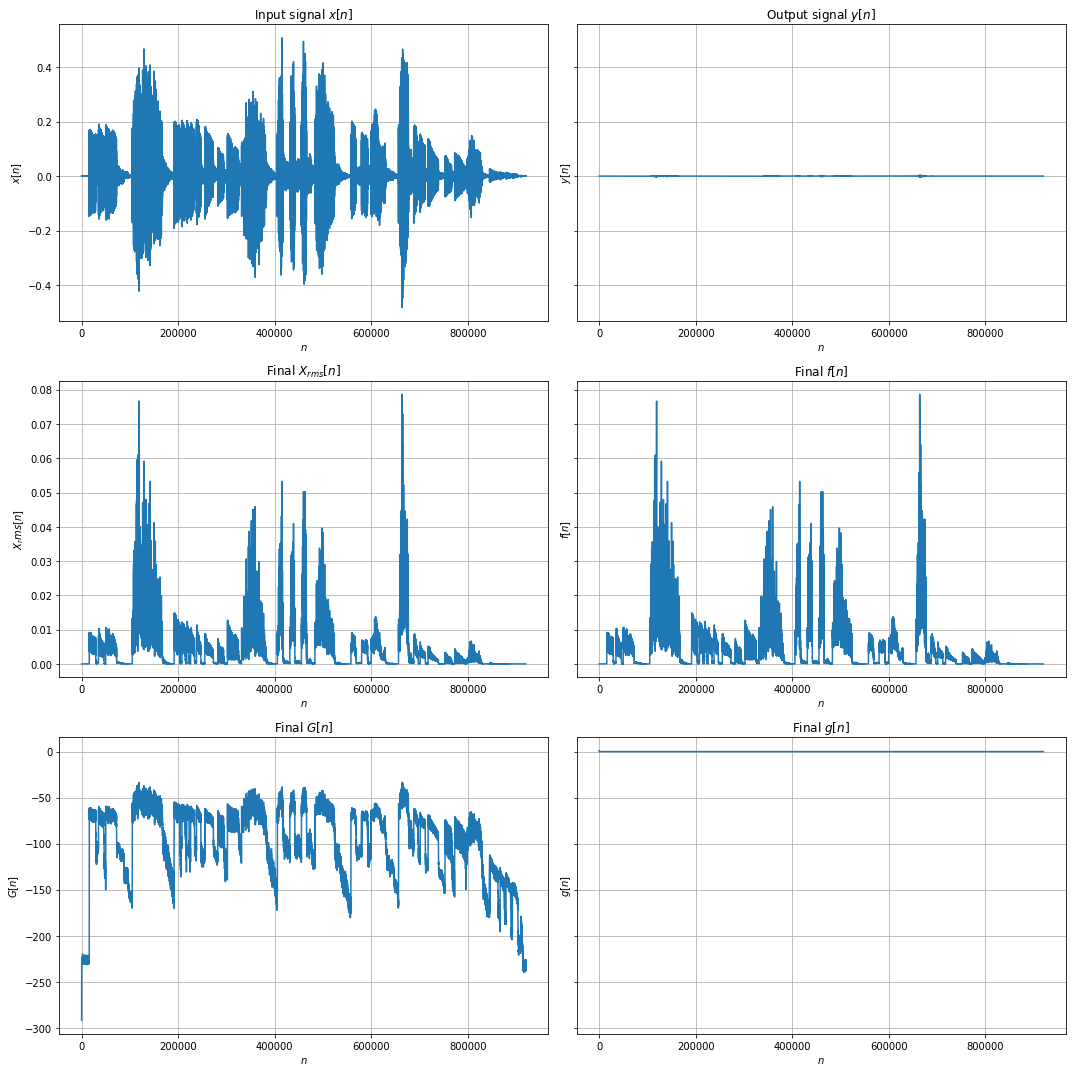

In [17]:
CT = 1
ET = 0.05
CS = 0.1
ES = -3

tav = 0.01
at = 0.03
rt = 0.01
delay = 20

y, rms, G, f, g = compexp(x, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x, y, rms, f, G, g, 'compexp_gtr-jazz-3_expander')
sf.write('audios/vocalize_gtr-jazz-3_out.wav', y, sr)